In [68]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import itertools as it
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Punto 1

In [3]:
data = pd.read_csv('Default.csv')

In [4]:
print(data.shape)
data.head()

(10000, 5)


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [5]:
data['studentBin'] = list(map(lambda x:1 if x=='Yes' else 0 , data.student))
data['target'] = list(map(lambda x:1 if x=='Yes' else 0 , data.default))

In [6]:
data.head()

,Unnamed: 0,default,student,balance,income,studentBin,target
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,1,0
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0


In [7]:
features = data.columns[3:-2]
print(features)

Index(['balance', 'income'], dtype='object')


In [8]:
clf = LinearDiscriminantAnalysis()
clf.fit(data[features],data.target)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [9]:
probs = clf.predict_proba(data[features])


In [10]:
probs1 = probs[:,1]

In [11]:
def predictions(probs,threshold):
    return np.array(list(map(lambda x: 1 if x>threshold else 0,probs)))
    

In [12]:
def totalError(preds,trues):
#     print(np.sum(preds==trues),len(preds),np.sum(preds==trues)/(len(preds)))
    return ((len(preds))-np.sum(preds==trues))/(len(preds))
def fracWrongErr(preds,trues):
    totDefault = np.sum(trues)
    cont = 0 
    for i in range(len(preds)):
        if trues[i]==1:
#             print("true def")
            if preds[i] ==0:
                cont+=1
#     print(cont,totDefault,cont/totDefault)
    return cont/totDefault
def fracWrongErr2(preds,trues):
    totDefault = len(preds)-np.sum(trues)
    cont = 0 
    for i in range(len(preds)):
        if trues[i]==0:
#             print("true def")
            if preds[i] ==1:
                cont+=1
#     print(cont,totDefault,cont/totDefault)
    return cont/totDefault

In [13]:
xs = np.linspace(0,0.5,100)
totError = []
fracWrong = []
fracWrong2 = []
for x in xs:
    totError.append(totalError(predictions(probs1,x),data.target))
    fracWrong.append(fracWrongErr(predictions(probs1,x),data.target))
    fracWrong2.append(fracWrongErr2(predictions(probs1,x),data.target))

Text(0,0.5,'Error rate')

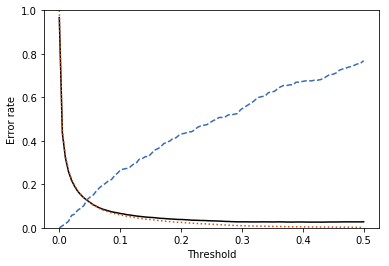

In [14]:
plt.plot(xs,totError,c='black')
plt.plot(xs,fracWrong,c='#396BB6',linestyle = '--')
plt.plot(xs,fracWrong2,c='#CD5218',linestyle=':')
plt.ylim(0,1)
plt.xlabel('Threshold')
plt.ylabel('Error rate')

In [15]:
def TPrate(preds,trues):
    TN,FP,FN,TP = confusion_matrix(trues,preds).ravel()
    return TP/(FN+TP)
def FPrate(preds,trues):
    TN,FP,FN,TP = confusion_matrix(trues,preds).ravel()
    return FP/(TN+FP)

In [16]:
xs = np.linspace(0,1,1000)
tprate = []

fprate = []

for x in xs:
    tprate.append(TPrate(predictions(probs1,x),data.target))
    fprate.append(FPrate(predictions(probs1,x),data.target))

    

Text(0,0.5,'True positive rate')

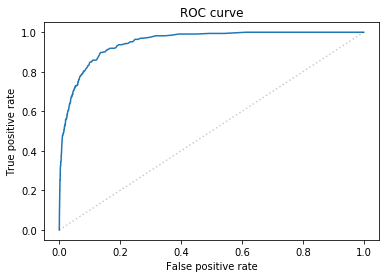

In [17]:
plt.plot(fprate,tprate)
plt.plot(xs,xs,c='black',linestyle=':',alpha = 0.2)
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# Punto 2

In [18]:
def precision(TN,FP,FN,TP):
    return TP/(TP+FP)
def recall(TN,FP,FN,TP):
    return TP/(TP+FN)

In [19]:
clf = LogisticRegression()
clf.fit(data[features], data.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
probs = clf.predict_proba(data[features])
probs1 = probs[:,1]

In [21]:
ths = np.linspace(0,1,1000)
p = []
r = []
for th in ths:
    TN,FP,FN,TP = confusion_matrix(data.target,predictions(probs1,th)).ravel()
    p.append(precision(TN,FP,FN,TP))
    r.append(recall(TN,FP,FN,TP))

/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


Text(0,0.5,'Precision')

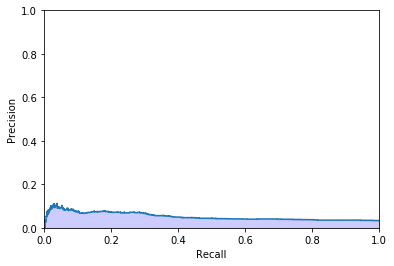

In [24]:
plt.step(r,p)
plt.fill_between(r, p, alpha=0.2, color='b')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Recall')
plt.ylabel('Precision')

# Punto 3

In [28]:
boston = pd.read_csv('Boston.csv')

In [29]:
print(boston.shape)
boston.head()


(506, 15)


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [30]:
features = boston.columns[2:]
print(features)


Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [31]:
media = np.mean(boston.crim)
boston['target'] = list(map(lambda x : 1 if x>media else 0,boston.crim))

In [32]:
lr = LogisticRegression()
lr.fit(boston[features],boston.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
features[abs(lr.coef_[0])>0.5]

Index(['rm', 'rad', 'ptratio'], dtype='object')

In [34]:
lda = LinearDiscriminantAnalysis()
lda.fit(boston[features],boston.target)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [35]:
features[abs(lda.coef_[0])>1]

Index(['chas', 'nox', 'rm', 'rad'], dtype='object')

Text(0.5,1,'Precision-recall curves')

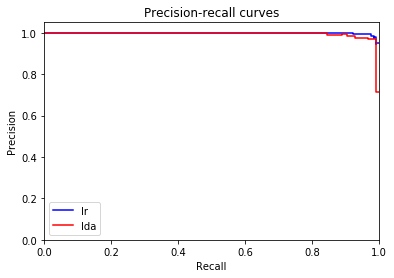

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(boston.target, lr.predict_proba(boston[features])[:,1])

plt.step(recall, precision, color='b',
         where='post',label='lr')
precision, recall, _ = precision_recall_curve(boston.target, lda.predict_proba(boston[features])[:,1])

plt.step(recall, precision, color='r',
         where='post',label='lda')
# plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-recall curves")

Text(0.5,1,'ROC curves')

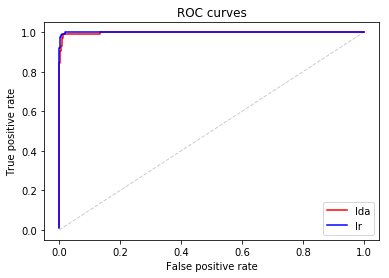

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(boston.target, lda.predict_proba(boston[features])[:,1])
plt.plot(fpr,tpr,c='r',label='lda')
fpr, tpr, thresholds = metrics.roc_curve(boston.target, lr.predict_proba(boston[features])[:,1])
plt.plot(fpr,tpr,c='b',label = 'lr')
plt.plot(fpr,fpr,c='black',linestyle='--',alpha=0.2,lw=1)
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC curves")

In [69]:
all_train, all_test = train_test_split(boston,test_size = 0.25)
bestFeatures = []
bestF1 = []
for nParam in range(1,3):
    print('nparam={}'.format(nParam))
    featureCombs = list(it.combinations(features,nParam))
    maxf1s = []

    for featurePair in featureCombs:

        lr = LogisticRegression()
        lr.fit(all_train[list(featurePair)],all_train.target)
        thresholds = np.linspace(0,1,100)
        f1s = []
        for th in thresholds:
            f1s.append(f1_score(all_test.target,predictions(lr.predict_proba(all_test[list(featurePair)])[:,1],th)))
        f1s = np.array(f1s)
        maxf1s.append(max(f1s))
    featureCombs=np.array(featureCombs)
    bestFeatures.append(featureCombs[maxf1s==max(maxf1s)])
    bestF1.append(max(maxf1s))

nparam=1


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


nparam=2


In [70]:
print(bestFeatures)
print(bestF1)

[array([['rad']], dtype='<U7'), array([['zn', 'rad'],
       ['indus', 'rad'],
       ['indus', 'tax'],
       ['chas', 'rad'],
       ['nox', 'rad'],
       ['rm', 'rad'],
       ['age', 'rad'],
       ['dis', 'rad'],
       ['rad', 'tax'],
       ['rad', 'ptratio'],
       ['rad', 'black'],
       ['rad', 'lstat'],
       ['rad', 'medv']], dtype='<U7')]
[0.9873417721518987, 0.9873417721518987]


De las curvas anteriores, podemos ver que el algoritmo **logistic regression** tiene un mejor desempeño tanto en las curvas de precision-recall como en las curvas de ROC. Así pues, dado que logistic regression es el mejor modelo, calculamos los mejores predictores para predecir con logistic regression si un suburbio tiene una rata de crimen mayor o menor a la media. Encontramos que 'rad' el indice de accesabilidad a autopistas radiales, es el  mejor predictor con f1=0.987341. Para 2 parametros, no aumenta f1 y casi todos los pares de features incluyen a rad. Así pues, concluimos que el mejor predictor de crimen bajo el modelo de logistic regression, es rad. 

# Punto 4

In [73]:
autos = pd.read_csv('./Auto.csv')
autos.head() 

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [83]:
media = np.mean(autos.mpg)
autos['target'] = list(map(lambda x : 1 if x>media else 0, autos.mpg))
print(autos.shape)

(392, 11)


In [85]:
features = train.columns[2:-2]
print(features)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')


In [86]:
train,test = train_test_split(autos,test_size = 0.25)

In [89]:
lda = LinearDiscriminantAnalysis()
lda.fit(train[features],train.target)
lr = LogisticRegression()
lr.fit(train[features],train.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0.5,1,'Precision-recall curves')

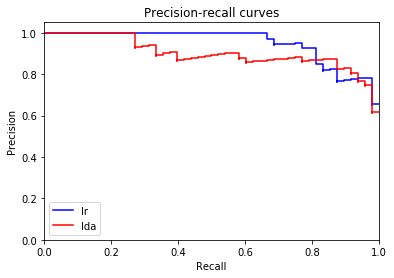

In [90]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(test.target, lr.predict_proba(test[features])[:,1])

plt.step(recall, precision, color='b',
         where='post',label='lr')
precision, recall, _ = precision_recall_curve(test.target, lda.predict_proba(test[features])[:,1])

plt.step(recall, precision, color='r',
         where='post',label='lda')
# plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-recall curves")

Text(0.5,1,'ROC curves')

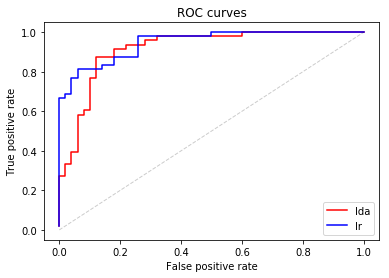

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(test.target, lda.predict_proba(test[features])[:,1])
plt.plot(fpr,tpr,c='r',label='lda')
fpr, tpr, thresholds = metrics.roc_curve(test.target, lr.predict_proba(test[features])[:,1])
plt.plot(fpr,tpr,c='b',label = 'lr')
plt.plot(fpr,fpr,c='black',linestyle='--',alpha=0.2,lw=1)
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC curves")

Dado que las curvas de ROC y precision recall no son contundentes, escojamos el mejor modelo basado en el máximo valor de f1. 

In [96]:
thresholds = np.linspace(0,1,100)
ldaf1 = []
lrf1=[]
for th in thresholds:
        lrf1.append(f1_score(test.target,predictions(lr.predict_proba(test[list(features)])[:,1],th)))
        ldaf1.append(f1_score(test.target,predictions(lda.predict_proba(test[list(features)])[:,1],th)))

mxf1lr = max(ldaf1)
maxf1lda = max(lrf1)
print(mxf1lr)
print(maxf1lda)

0.875
0.8666666666666666


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Por lo tanto, concluimos que el mejor modelo es el de **logistic regression**. 

In [101]:
all_train, all_test = train_test_split(autos,test_size = 0.25)
bestFeatures = []
bestF1 = []
for nParam in range(1,5):
    print('nparam={}'.format(nParam))
    featureCombs = list(it.combinations(features,nParam))
    maxf1s = []

    for featurePair in featureCombs:

        lr = LogisticRegression()
        lr.fit(all_train[list(featurePair)],all_train.target)
        thresholds = np.linspace(0,1,100)
        f1s = []
        for th in thresholds:
            f1s.append(f1_score(all_test.target,predictions(lr.predict_proba(all_test[list(featurePair)])[:,1],th)))
        f1s = np.array(f1s)
        maxf1s.append(max(f1s))
    featureCombs=np.array(featureCombs)
    bestFeatures.append(featureCombs[maxf1s==max(maxf1s)])
    bestF1.append(max(maxf1s))

nparam=1


/home/mauro/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


nparam=2
nparam=3
nparam=4


In [102]:
print(bestFeatures)
print(bestF1)

[array([['displacement']], dtype='<U12'), array([['weight', 'year']], dtype='<U12'), array([['displacement', 'acceleration', 'year']], dtype='<U12'), array([['cylinders', 'displacement', 'weight', 'year'],
       ['displacement', 'weight', 'acceleration', 'year'],
       ['displacement', 'weight', 'year', 'origin']], dtype='<U12')]
[0.9142857142857143, 0.92, 0.923076923076923, 0.9215686274509803]


Con lo anterior, concluimos que el mejor valor de f1 se da cuando se utilizan los features **'displacement', 'acceleration', 'year'**. Así pues, los mejores predictores para calcular si mpg mayor o menor a la media son **'displacement', 'acceleration', 'year'**.